---------------------------
### Aim : to show the context on Logistic regression
------------------------------

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression

from sklearn import preprocessing, model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
"""
5. Number of Instances: 214
6. Number of Attributes: 10 (including an Id#) plus the class attribute
   -- all attributes are continuously valued
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""

'\n5. Number of Instances: 214\n6. Number of Attributes: 10 (including an Id#) plus the class attribute\n   -- all attributes are continuously valued\n7. Attribute Information:\n   1. Id number: 1 to 214\n   2. RI: refractive index\n   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as \n                  are attributes 4-10)\n   4. Mg: Magnesium\n   5. Al: Aluminum\n   6. Si: Silicon\n   7. K: Potassium\n   8. Ca: Calcium\n   9. Ba: Barium\n  10. Fe: Iron\n  11. Type of glass: (class attribute)\n      -- 1 building_windows_float_processed\n      -- 2 building_windows_non_float_processed\n      -- 3 vehicle_windows_float_processed\n      -- 4 vehicle_windows_non_float_processed (none in this database)\n      -- 5 containers\n      -- 6 tableware\n      -- 7 headlamps\n\n9. Class Distribution: (out of 214 total instances)\n    -- 163 Window glass (building windows and vehicle windows)\n       -- 87 float processed  \n          -- 70 building windows\n          --

In [2]:
#location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/glass.csv"
location = r'D:\AI-DATASETS\01-MISC\glass.csv'

In [9]:
# load the training data from glass data set
df_training = pd.read_csv(location)

In [10]:
df_training.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Pretend that we want to predict $ri$, and our only feature is $al$. 

`Question`: How could we do it using machine learning?

`Answer`: We could frame it as a regression problem, and use a linear 
        regression model with $al$ as the only feature and $ri$ as the 
        response.

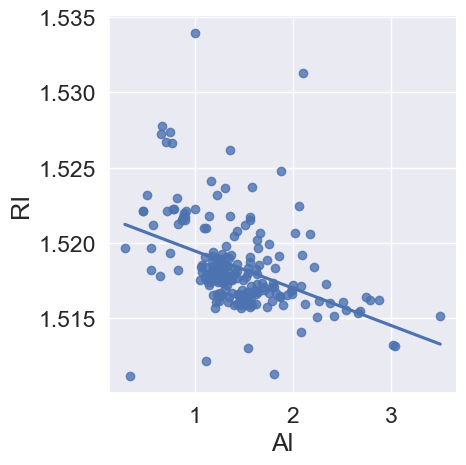

In [11]:
sns.lmplot(x='Al', y='RI', data=df_training, ci=None);

In [13]:
# examine glass_type
df_training.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [14]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
df_training['household'] = df_training.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

In [17]:
df_training.sample(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household
165,166,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00,5,1
198,199,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1,0
175,176,1.52119,12.97,0.33,1.51,73.39,0.13,11.27,0.00,0.28,5,1
153,154,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00,3,0
24,25,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.00,0.00,1,0
66,67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17,1,0
119,120,1.51652,13.56,3.57,1.47,72.45,0.64,7.96,0.00,0.00,2,0
26,27,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.00,0.00,1,0
183,184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6,1


In [18]:
df_training.household.value_counts()

0    163
1     51
Name: household, dtype: int64

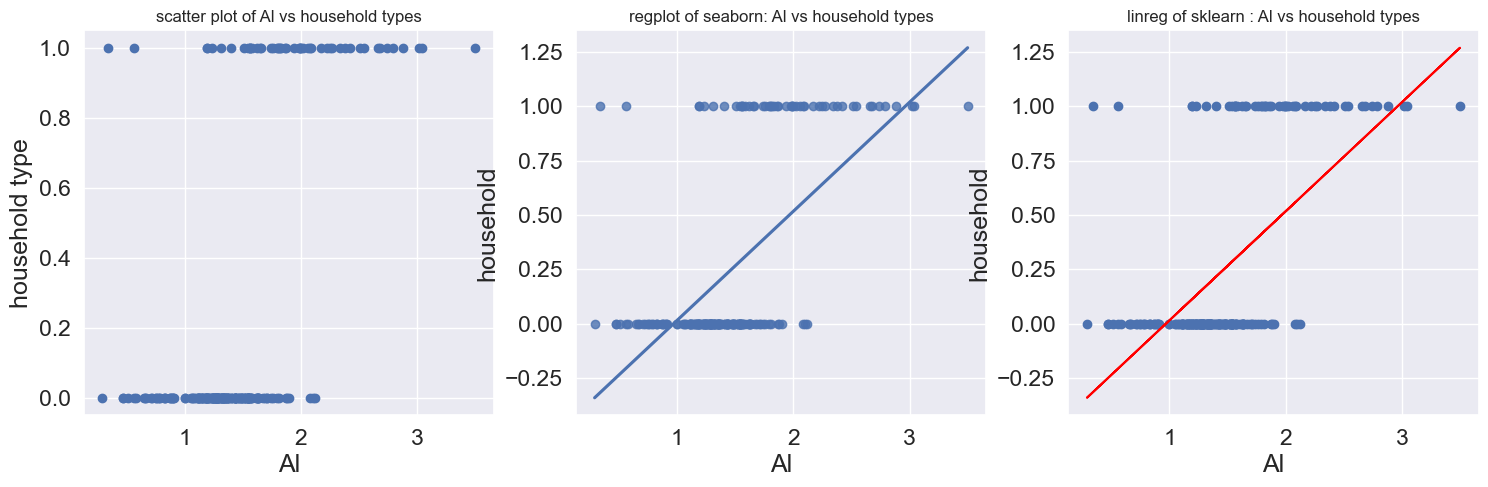

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

ax1.scatter(df_training.Al, df_training.household)
ax1.set_xlabel('Al')
ax1.set_ylabel('household type')
ax1.set_title('scatter plot of Al vs household types', fontsize=12)


sns.regplot(x='Al', y='household', data=df_training, ci=None, ax=ax2);
ax2.set_title('regplot of seaborn: Al vs household types', fontsize=12)

# fit a linear regression model and store the predictions
linreg = LinearRegression()
feature_cols = ['Al']

X = df_training[feature_cols]

y = df_training.household

linreg.fit(X, y)

df_training['household_pred'] = linreg.predict(X)

# scatter plot that includes the regression line
ax3.scatter(df_training.Al, df_training.household)

ax3.plot(df_training.Al, df_training.household_pred, color='red')

ax3.set_xlabel('Al')
ax3.set_ylabel('household')
ax3.set_title('linreg of sklearn : Al vs household types', fontsize=12);

If al=3, what class do we predict for household? 1

If al=1.5, what class do we predict for household? 0

We predict the 0 class for lower values of al, and 
the 1 class for higher values of al. 
What's our cutoff value? 
Around al=2, because that's where the linear regression line crosses 
the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if household_pred >= 0.5, 
we predict a class of 1, else we predict a class of 0.